In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def print_matrix(matrix):
    for i in range(len(matrix)):
        print(matrix[i])

In [2]:
def build_skeleton(graph_adj, skeleton_adj, N):
    skeleton_connection = [0 for i in range(N)]
    # Соединяем пару точек (i,j) с наименьшим ρij
    build_skeleton_i = 1
    min_weight_i, min_weight_j = 0, 1
    min_weight = graph_adj[min_weight_i][min_weight_j]
    for i in range(N):
        for j in range(i + 1, N):
            if min_weight > graph_adj[i][j]:
                min_weight = graph_adj[i][j]
                min_weight_i, min_weight_j = i, j
    skeleton_adj[min_weight_i][min_weight_j] = min_weight
    skeleton_adj[min_weight_j][min_weight_i] = skeleton_adj[min_weight_i][min_weight_j]
    skeleton_connection[min_weight_i] = skeleton_connection[min_weight_j] = 1
    print("Build skeleton. Iteration {}".format(build_skeleton_i))
    print_matrix(skeleton_adj)
    print("Connected vertices: {}".format(skeleton_connection))
     # Пробегаемся пока есть несоединненые точки
    while 0 in skeleton_connection:
        build_skeleton_i += 1
        min_weight = None
        min_weight_i = min_weight_j = None
        for i in range(N):
            if skeleton_connection[i] == 1:
                for j in range(N):
                    if i == j or skeleton_connection[j] == 1 or skeleton_adj[i][j] != 0:
                        continue
                    if min_weight is None or min_weight > graph_adj[i][j]:
                        min_weight = graph_adj[i][j]
                        min_weight_i, min_weight_j = i, j
        skeleton_adj[min_weight_i][min_weight_j] = min_weight
        skeleton_adj[min_weight_j][min_weight_i] = skeleton_adj[min_weight_i][min_weight_j]
        skeleton_connection[min_weight_i] = skeleton_connection[min_weight_j] = 1
        print("Build skeleton. Iteration {}".format(build_skeleton_i))
        print_matrix(skeleton_adj)
        print("Connected vertices: {}".format(skeleton_connection))
   

In [3]:
def draw_graph(adj, N, clustered_vertices=None):
    # Строим граф
    G = nx.Graph()
    for i in range(len(adj)):
        G.add_node(i)
    for i in range(N):
        for j in range(i + 1, N):
            if adj[i][j] != 0:
                G.add_edge(i, j)
    edge_labels = {}
    for i in range(N):
        for j in range(i + 1, N):
            if adj[i][j] != 0:
                edge_labels[(i, j)] = adj[i][j]
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Рисуем кластеры
    if clustered_vertices is not None:
        for i in range(len(clustered_vertices)):
            current_vertex_cluster = clustered_vertices[i]
            x, y = pos[i]
            plt.text(x, y + 0.1, s=str(current_vertex_cluster), bbox=dict(facecolor='green', alpha=0.5),
                     horizontalalignment='right')
    plt.show()

In [4]:
def separate_clusters(graph_adj, N, K):
    # удаление K − 1 самых длинных рёбер
    for c in range(K - 1):
        # Поиск ребра с макс весом
        max_weight = None
        max_weight_i = max_weight_j = None
        for i in range(N):
            for j in range(i + 1, N):
                if graph_adj[i][j] != 0 and (max_weight is None or graph_adj[i][j] > max_weight):
                    max_weight = graph_adj[i][j]
                    max_weight_i = i
                    max_weight_j = j
        # удаляем это ребро
        graph_adj[max_weight_i][max_weight_j] = graph_adj[max_weight_j][max_weight_i] = 0

In [5]:
def cluster_graph(graph_adj, N):
    clustered_vertices = [-1 for i in range(N)]
    last_cluster_number = 1
    vertices_to_visit = [0]
    while len(vertices_to_visit) > 0:
        current_vertex = vertices_to_visit.pop()
        current_cluster_number = clustered_vertices[current_vertex]
        adj_vertices = []
        for j in range(N):
            if graph_adj[current_vertex][j] != 0:
                adj_vertices.append(j)
                if clustered_vertices[j] != -1:
                    current_cluster_number = clustered_vertices[j]

        if current_cluster_number == -1:
            current_cluster_number = last_cluster_number
            last_cluster_number += 1

        clustered_vertices[current_vertex] = current_cluster_number
        for adj_vertex in adj_vertices:
            if clustered_vertices[adj_vertex] == -1:
                vertices_to_visit.append(adj_vertex)
                clustered_vertices[adj_vertex] = current_cluster_number
            elif adj_vertex in vertices_to_visit:
                vertices_to_visit.remove(adj_vertex)

        if len(vertices_to_visit) == 0:
            for i in range(N):
                if clustered_vertices[i] == -1:
                    vertices_to_visit.append(i)
                    break
    return clustered_vertices

Input graph
[0, 60, 55, 69, 23, 89, 74, 21, 91, 70]
[60, 0, 30, 7, 43, 98, 70, 16, 16, 6]
[55, 30, 0, 10, 67, 42, 74, 29, 58, 65]
[69, 7, 10, 0, 63, 59, 27, 83, 45, 17]
[23, 43, 67, 63, 0, 31, 92, 83, 72, 47]
[89, 98, 42, 59, 31, 0, 32, 3, 11, 43]
[74, 70, 74, 27, 92, 32, 0, 30, 87, 70]
[21, 16, 29, 83, 83, 3, 30, 0, 79, 70]
[91, 16, 58, 45, 72, 11, 87, 79, 0, 4]
[70, 6, 65, 17, 47, 43, 70, 70, 4, 0]


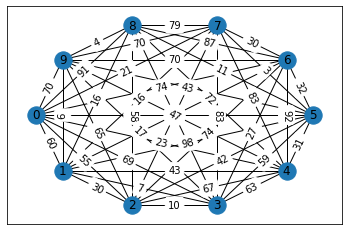

Build skeleton. Iteration 1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Connected vertices: [0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
Build skeleton. Iteration 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 3, 11, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 11, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Connected vertices: [0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
Build skeleton. Iteration 3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 3, 11, 0]
[0, 0

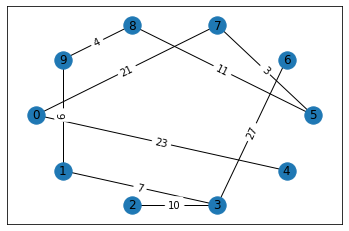

After cluster highlighting
[0, 0, 0, 0, 0, 0, 0, 21, 0, 0]
[0, 0, 0, 7, 0, 0, 0, 0, 0, 6]
[0, 0, 0, 10, 0, 0, 0, 0, 0, 0]
[0, 7, 10, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 3, 11, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[21, 0, 0, 0, 0, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 11, 0, 0, 0, 4]
[0, 6, 0, 0, 0, 0, 0, 0, 4, 0]


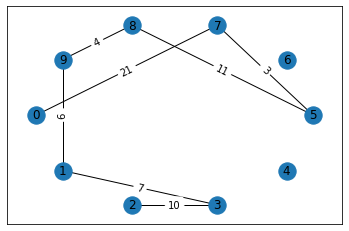

Cluster result
[1, 1, 1, 1, 2, 1, 3, 1, 1, 1]


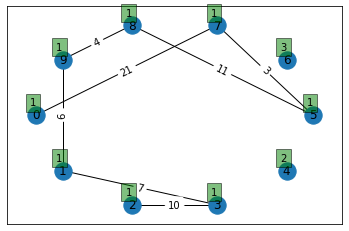

In [6]:
if __name__ == '__main__':
    N = 10
    K = 3
    graph_adj = [[0 for j in range(N)] for i in range(N)]
    skeleton_adj = [[0 for j in range(N)] for i in range(N)]

    # генерация графа
    for i in range(N):
        for j in range(i + 1, N):
            graph_adj[i][j] = np.random.randint(1, 100)
            graph_adj[j][i] = graph_adj[i][j]
    print('Input graph')
    print_matrix(graph_adj)
    draw_graph(graph_adj, N)

    build_skeleton(graph_adj, skeleton_adj, N)
    print('Skeleton graph')
    print_matrix(skeleton_adj)
    draw_graph(skeleton_adj, N)

    separate_clusters(skeleton_adj, N, K)
    print('After cluster highlighting')
    print_matrix(skeleton_adj)
    draw_graph(skeleton_adj, N)

    clustered_vertices = cluster_graph(skeleton_adj, N)
    print('Cluster result')
    print(clustered_vertices)
    draw_graph(skeleton_adj, N, clustered_vertices)